In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
from tools_EL import readingtemp, plottingtemp
import scipy as sp               # pour le traitement du signal (tout n'est pas dans numpy)
from scipy import signal
from scipy import fftpack 
import numpy as np


In [2]:
Raw=readingtemp('./Data/S3AIR.csv')

In [3]:
Raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Num         7688 non-null   int64         
 1   Time        7688 non-null   datetime64[ns]
 2   T1          7683 non-null   float64       
 3   T2          7683 non-null   float64       
 4   T3          7683 non-null   float64       
 5   T4          7683 non-null   float64       
 6   SensorName  7688 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 420.6+ KB


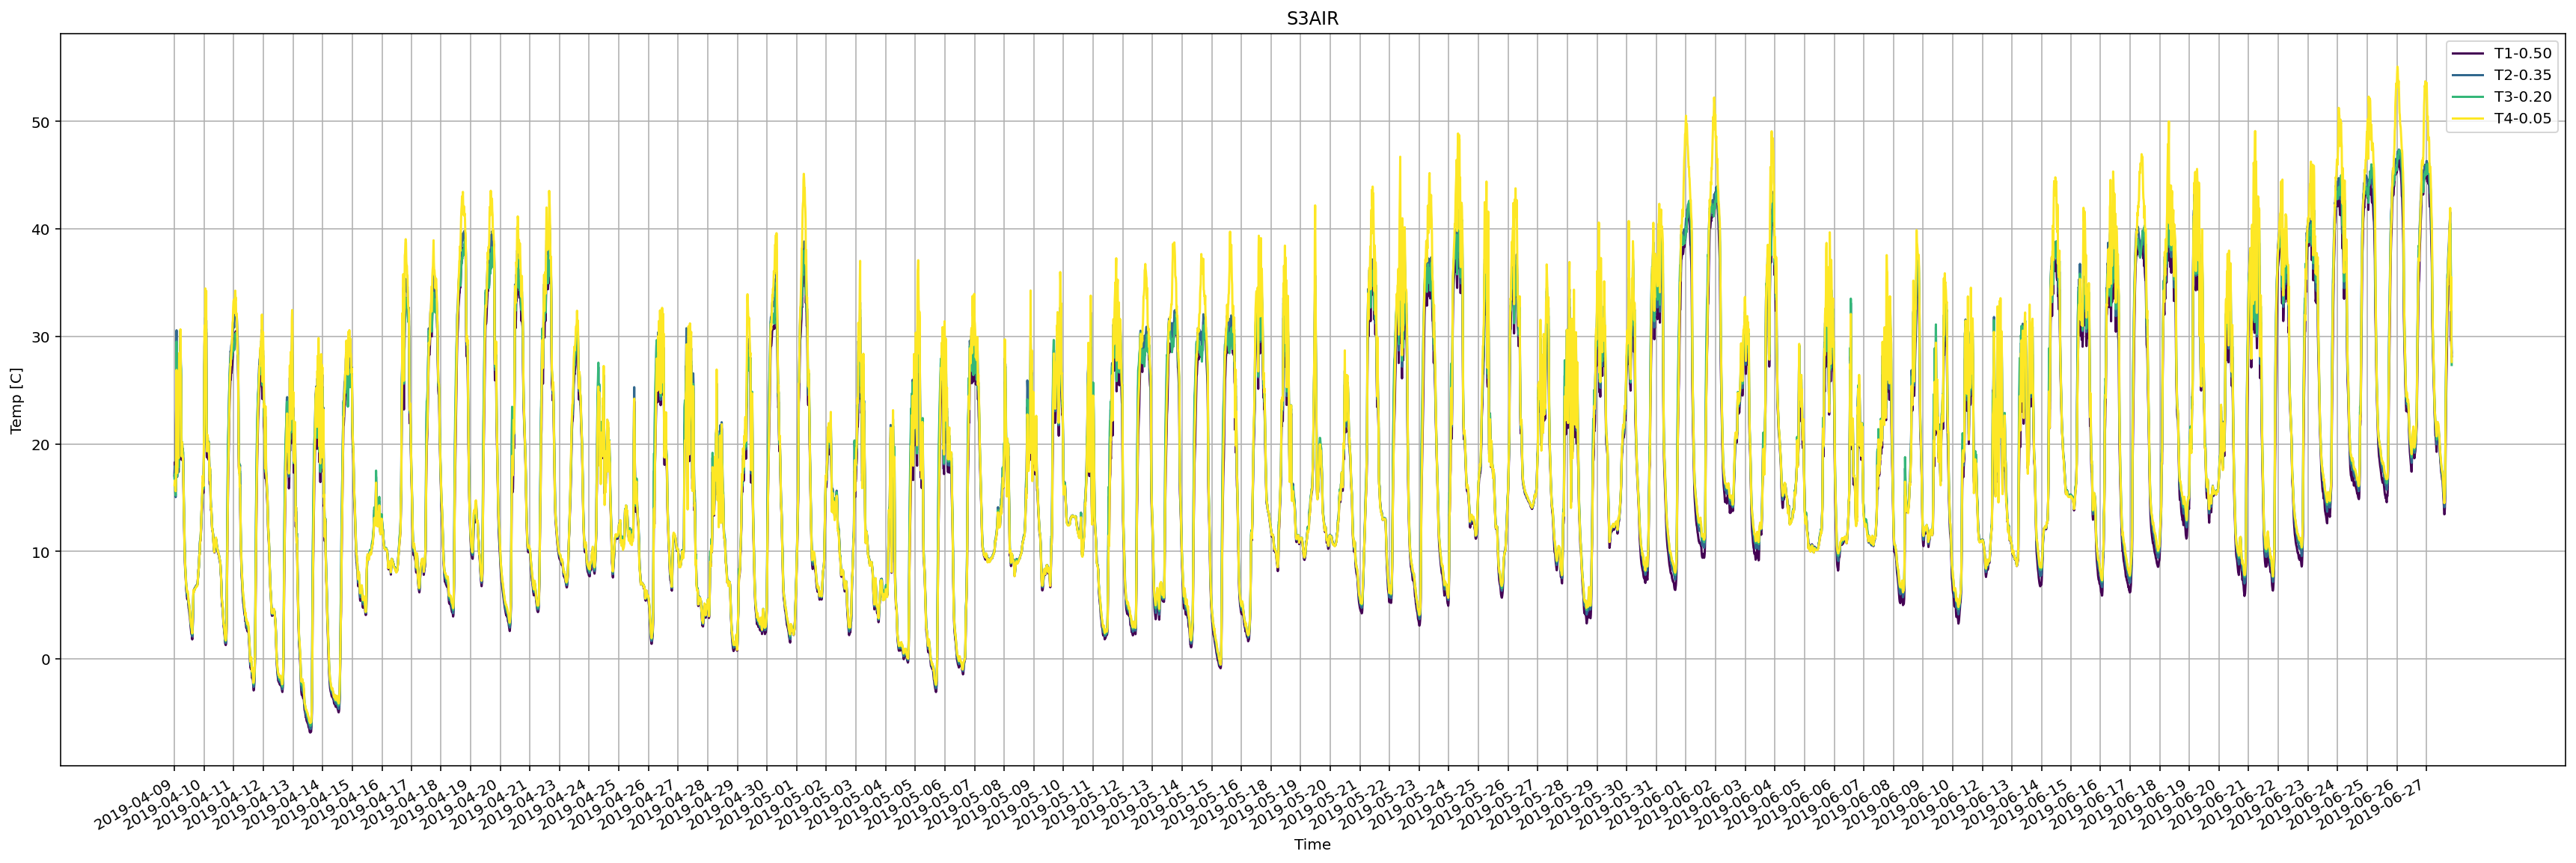

In [4]:
plt.close('all')
fig, ax1 = plt.subplots(figsize=(30,10))
sampling_time=100 #every 50th data
plottingtemp(Raw,fig,ax1,sampling_time)


In [5]:
#Temps relatifs
Raw['RelT']=(Raw.Time-Raw.Time.iloc[0])

In [6]:
#Je vire les nan pour faire une fft et un TFT
Raw_r=Raw.dropna()

In [7]:
#on av vire le f0
Raw_r['T1_dt']=sp.signal.detrend(Raw_r['T1'])
Raw_r['T2_dt']=sp.signal.detrend(Raw_r['T2'])
Raw_r['T3_dt']=sp.signal.detrend(Raw_r['T3'])
Raw_r['T4_dt']=sp.signal.detrend(Raw_r['T4'])

<ipython-input-7-efc16d3b8953>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw_r['T1_dt']=sp.signal.detrend(Raw_r['T1'])
<ipython-input-7-efc16d3b8953>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Raw_r['T2_dt']=sp.signal.detrend(Raw_r['T2'])
<ipython-input-7-efc16d3b8953>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

<ipython-input-8-651bc3b416eb>:15: RuntimeWarning: divide by zero encountered in true_divide
  timi=1/frequency
<ipython-input-8-651bc3b416eb>:15: RuntimeWarning: divide by zero encountered in true_divide
  timi=1/frequency


<ipython-input-8-651bc3b416eb>:15: RuntimeWarning: divide by zero encountered in true_divide
  timi=1/frequency
<ipython-input-8-651bc3b416eb>:15: RuntimeWarning: divide by zero encountered in true_divide
  timi=1/frequency


Text(0.5, 0.98, 'FFT-S3AIR')

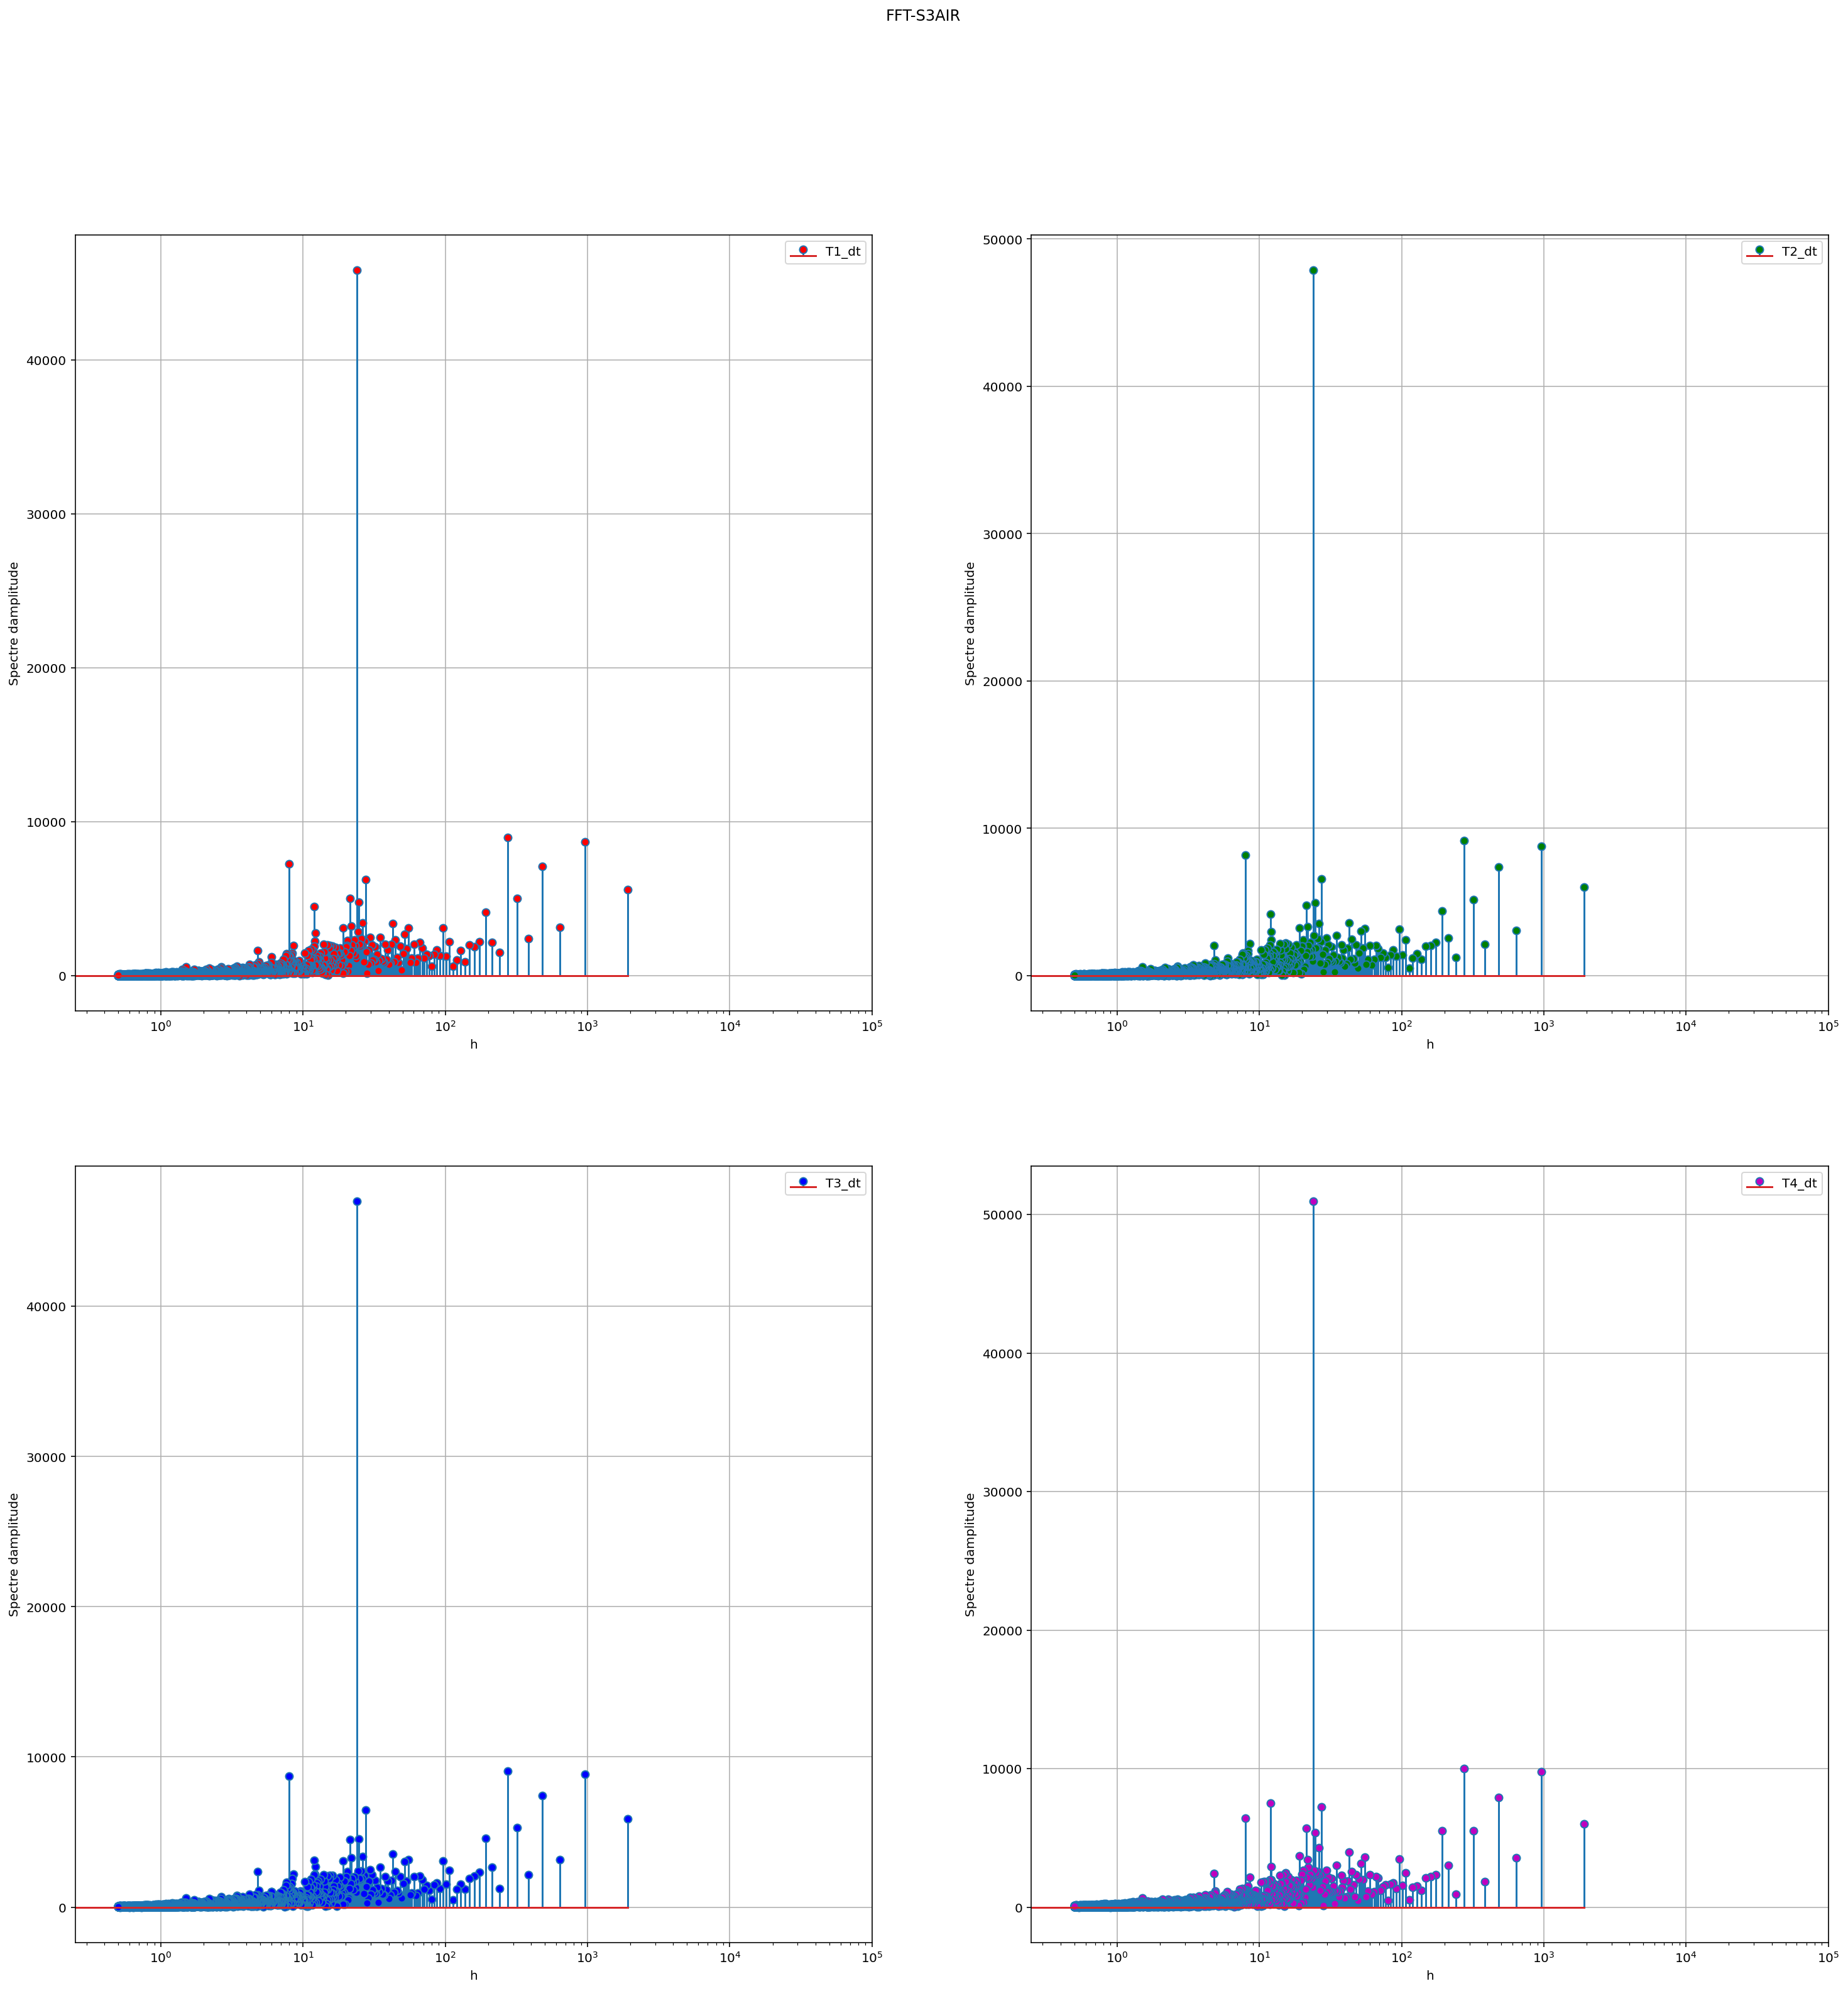

In [8]:
#%% FFT
plt.close('all')
fe=1/(15)#% minutes

namali=['T1_dt','T2_dt','T3_dt','T4_dt']
coloration=['r','g','b','m']
figure, axis = plt.subplots(2,2,figsize=(25,25))
kk=0
for ii in range(2):
    for jj in range(2): 
        YY = fftpack.fft(Raw_r[namali[kk]].values)
        frequency = fftpack.fftfreq(len(Raw_r)) * fe
        #freqplus=frequency[1:len(frequency)-1]

        timi=1/frequency
        timi[0]=0
        markerline, stemlines, baseline = axis[ii,jj].stem(timi/60, np.abs(YY),label=namali[kk])
        markerline.set_markerfacecolor(coloration[kk])
        axis[ii,jj].legend()
        axis[ii,jj].grid()
        axis[ii,jj].set_xlabel('h')
        axis[ii,jj].set_ylabel('Spectre d''amplitude')
        axis[ii,jj].set_xscale("log", base=10)   # échelle log pour l'axe des fréquences
        axis[ii,jj].set_xlim(1/(60*fe),100000)
        kk=kk+1
plt.suptitle('FFT-'+str(Raw_r.SensorName[0]))